In [57]:
import os
import random
import shutil
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
images_folder_path = r"C:\Users\Loga lv\Downloads\n07745940"
annotations_folder_path = r"C:\Users\Loga lv\Downloads\bboxes_annotations\n07745940\Annotation\n07745940"
# Define the directory names
organized_data_dir = "Organised_Data"
images_dir = os.path.join(organized_data_dir, "images")
annotations_files_dir = os.path.join(organized_data_dir, "annot_files")

# Create directories if they don't exist
os.makedirs(images_dir, exist_ok=True)
os.makedirs(annotations_files_dir, exist_ok=True)

print("Directories created successfully.")

images = os.listdir(images_folder_path)
for image in images:
    xml = os.path.splitext(image)[0]+ ".xml"
    if xml in os.listdir(annotations_folder_path):
        shutil.copy(os.path.join(images_folder_path, image), os.path.join("Organised_Data/images", image))
        shutil.copy(os.path.join(annotations_folder_path, xml), os.path.join("Organised_Data/annot_files", xml))


Directories created successfully.


In [64]:
images = os.listdir("Organised_Data/images")
random_images = random.sample(images, 20)
print(random_images)

def calculate_overlap_percentage(box1, box2):
    # Intersection coordinates
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    
    # Calculate intersection area
    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)

     # Calculate union area
    area_box1 = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    area_box2 = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    union_area = area_box1 + area_box2 - intersection_area
    overlap_percentage = intersection_area / union_area * 100
    return overlap_percentage


['n07745940_10.JPEG', 'n07745940_517.JPEG', 'n07745940_1881.JPEG', 'n07745940_11772.JPEG', 'n07745940_6985.JPEG', 'n07745940_10154.JPEG', 'n07745940_6402.JPEG', 'n07745940_11199.JPEG', 'n07745940_4644.JPEG', 'n07745940_10646.JPEG', 'n07745940_5664.JPEG', 'n07745940_9507.JPEG', 'n07745940_4070.JPEG', 'n07745940_9591.JPEG', 'n07745940_4677.JPEG', 'n07745940_3021.JPEG', 'n07745940_805.JPEG', 'n07745940_482.JPEG', 'n07745940_1218.JPEG', 'n07745940_1125.JPEG']


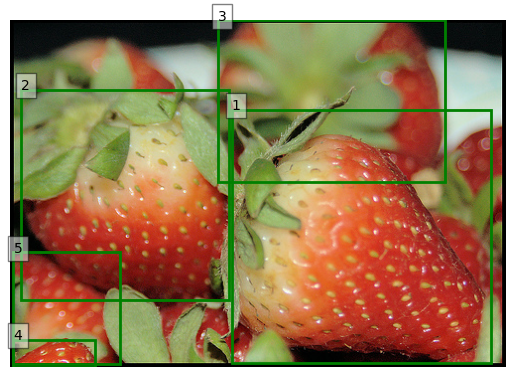

Overlap between Box 1 and Box 3: 18.00%
Overlap between Box 2 and Box 3: 1.39%
Overlap between Box 2 and Box 5: 9.42%
Overlap between Box 4 and Box 5: 16.66%


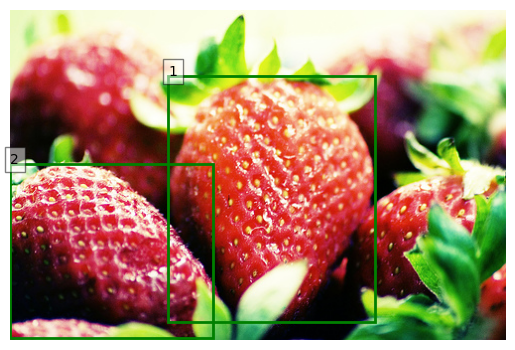

Overlap between Box 1 and Box 2: 9.11%


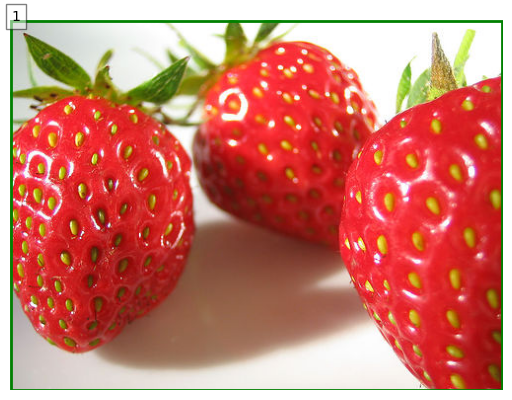

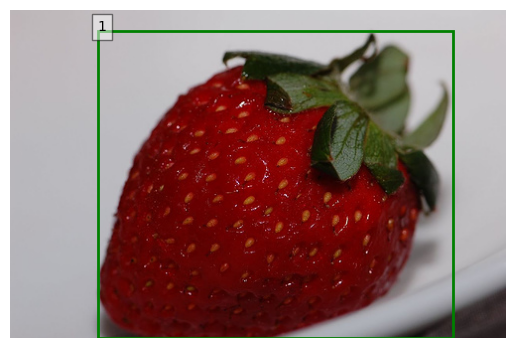

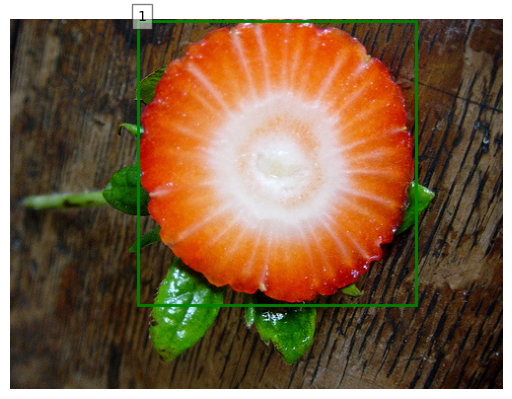

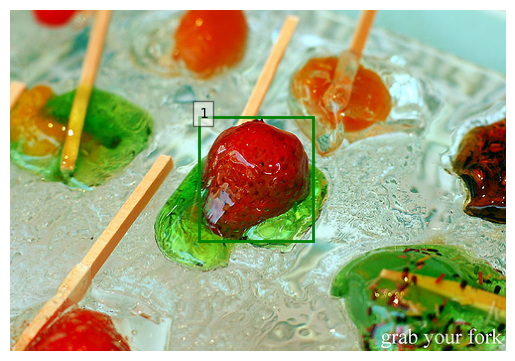

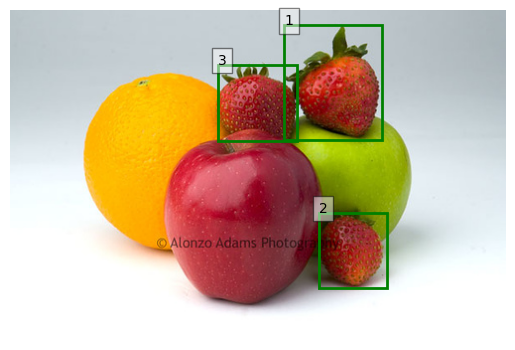

Overlap between Box 1 and Box 3: 6.41%


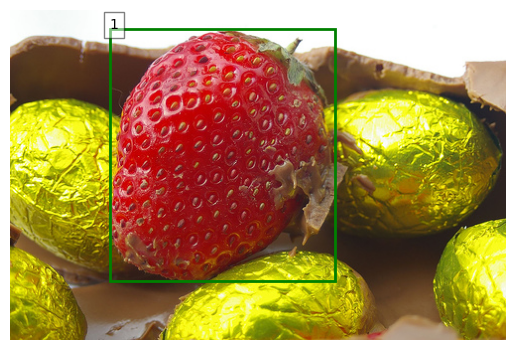

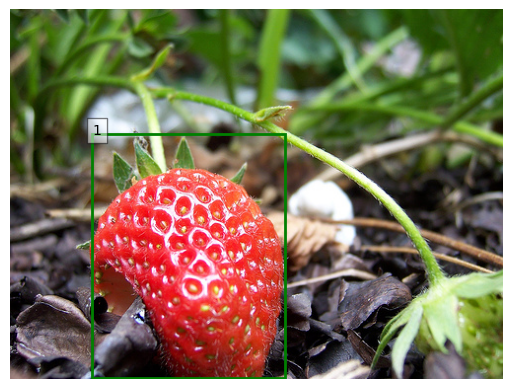

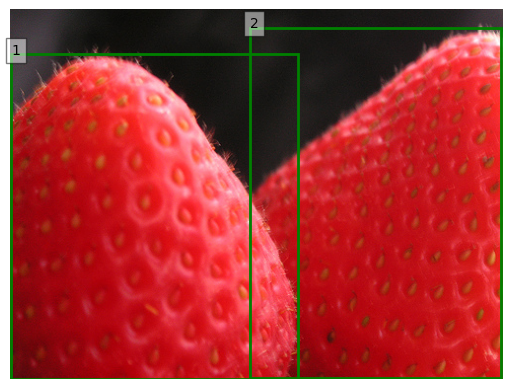

Overlap between Box 1 and Box 2: 9.62%


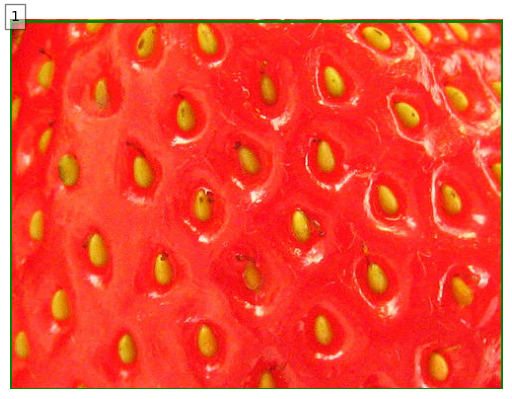

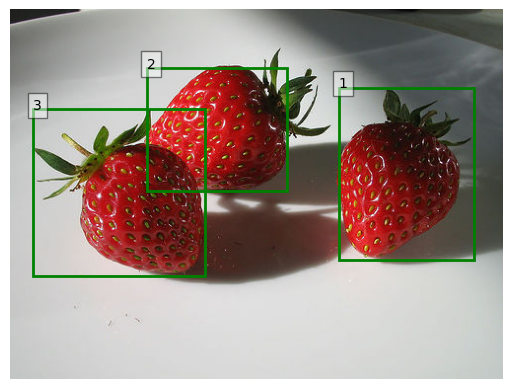

Overlap between Box 2 and Box 3: 11.76%


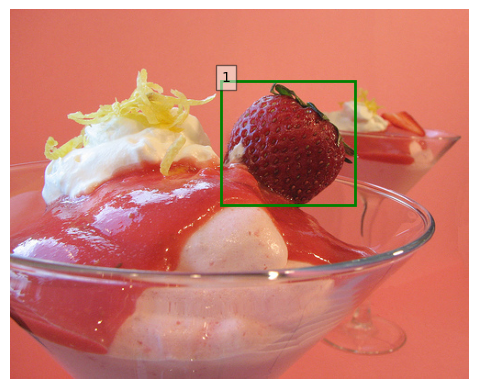

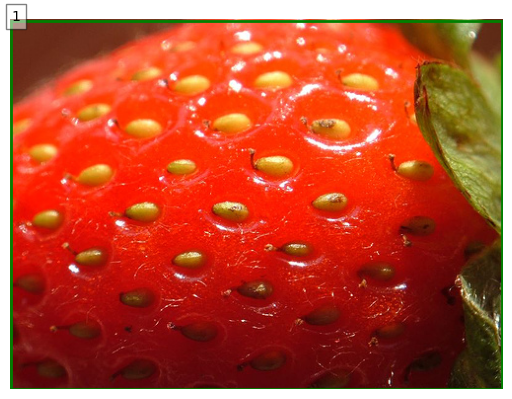

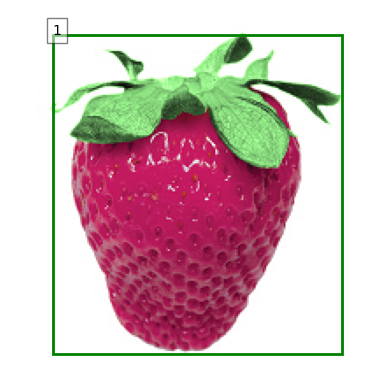

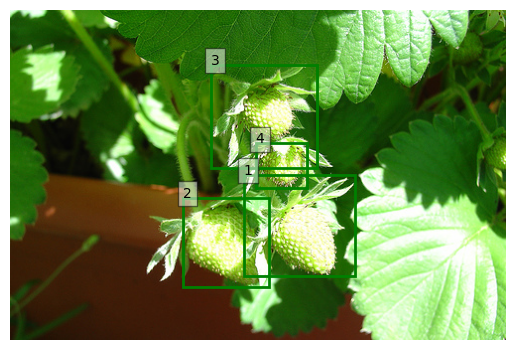

Overlap between Box 1 and Box 2: 12.35%
Overlap between Box 1 and Box 4: 5.56%
Overlap between Box 3 and Box 4: 11.11%


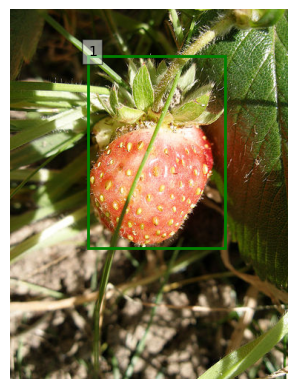

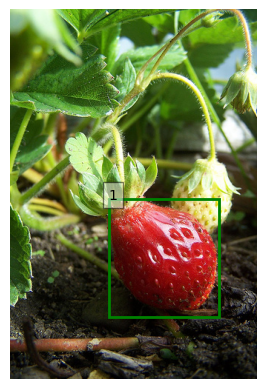

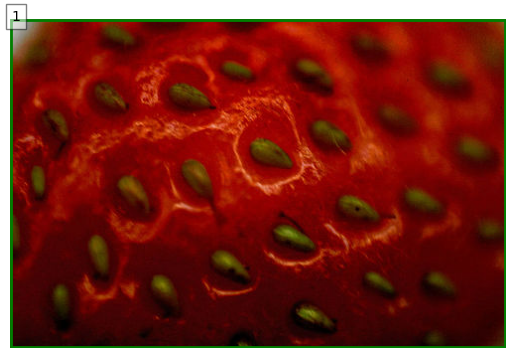

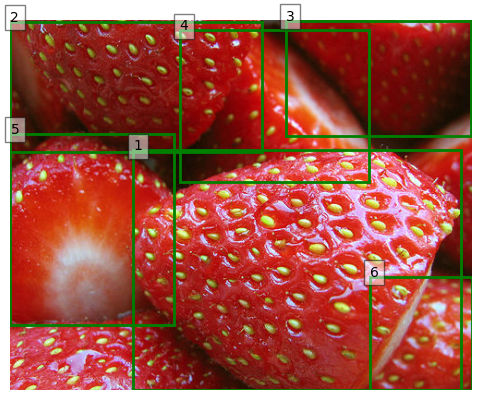

Overlap between Box 1 and Box 2: 0.32%
Overlap between Box 1 and Box 4: 6.04%
Overlap between Box 1 and Box 5: 7.06%
Overlap between Box 1 and Box 6: 13.10%
Overlap between Box 2 and Box 4: 19.69%
Overlap between Box 2 and Box 5: 5.19%
Overlap between Box 3 and Box 4: 21.65%


In [65]:
for image in random_images:
    image_path = os.path.join(images_dir, image)
    img = Image.open(image_path)

    xml_file = os.path.splitext(image)[0] + ".xml"
    xml_path = os.path.join(annotations_files_dir, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    fig, ax = plt.subplots(1)

    ax.imshow(img)

    box_count = 0
    boxes = []
    box_names = []
    overlap_messages = []  # Collect overlap messages
    for obj in root.findall('object'):
        box_count += 1
        xmin = int(obj.find('bndbox').find('xmin').text)
        ymin = int(obj.find('bndbox').find('ymin').text)
        xmax = int(obj.find('bndbox').find('xmax').text)
        ymax = int(obj.find('bndbox').find('ymax').text)
        
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='g', facecolor='none', fill=False)
        ax.add_patch(rect)
        ax.text(xmin, ymin, str(box_count), bbox=dict(facecolor='white', alpha=0.5))
        
        boxes.append([xmin, ymin, xmax, ymax])
        box_names.append(str(box_count))

    if len(boxes) > 1:
        for i in range(len(boxes)):
            for j in range(i + 1, len(boxes)):
                overlap_percentage = calculate_overlap_percentage(boxes[i], boxes[j])
                if overlap_percentage > 0:  # If there's an overlap, collect the message
                    overlap_messages.append(f"Overlap between Box {box_names[i]} and Box {box_names[j]}: {overlap_percentage:.2f}%")

    ax.axis('off')
    plt.show()

    # Print overlap messages below the image
    if overlap_messages:
        print("\n".join(overlap_messages))